#Random Walk Project 

Leon Zhou

#Goal

The goal for this project is to furthuer investigate Random Walk especially in 2 dimensional space.
More specifically: the walk starts at the origin, and each step is a randomly chosen unit vector. That is, to determine a step of the walk, first choose an angle from interval [ 0,2pi ). The step of the walk will then be (cos(x), sin(x))

Investigate folllowing questions:


1.   What is the avarage squared distance from the origin after n step
2.   When does the walk first return near the origin ? For example, what is the average number of steps until the walk returns to a circle of radius 1/2 for this modifies random walk. 
3. How does the walk behave if it is constrained to the region -10 <= y <= 10? Modify your code to keep the y-coordinate of the walk between -10 and 10. Then reconsider question 1 and 2 for this modified random walk



First, modify the code for computing random walk from class. The codes are mostly the same, besides, for this project, instead of randomly choosing a direction [0,1], [0,-1],[1,0],[-1,0], the next move is (cos(theta), sin(theta)). So, first define the number of steps to take, then create an empty 2-D array with 1 row and 2 columns. For next step, randomly take a values of theta in range (0,2pi), then the next move is (cos(theta), sin(theta)) and add to the original array. 

In [0]:
# define the possible moves at each step of the random walk
import matplotlib.pyplot as plt
import random
import numpy as np ## keep coding simple
import math

In [0]:

# define the number of steps to take
numStep = 1000

# set up a numpy 2-D array to store the locations visited.

locations = np.zeros((1,2))    # 1 row, 2 columns, entries set to zero
# take steps
for i in range(1,numStep):
     
    a = random.uniform(0, 2) # select a random factor
    theta = a * math.pi      # theta is random
    move = [math.cos(theta), math.sin(theta)]  # define movement 
    nextloc = locations[-1] + move  ## next location 
    locations = np.append(locations, [nextloc],axis=0) #append nextloc to loc  

Below is a graph to show where it walked

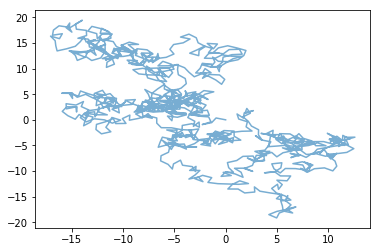

In [0]:
plt.plot(locations[:,0], locations[:,1], alpha = 0.6)

#Average Squared Distance

First, pack all we have above into a function so wwe could use later. The function takes number of steps as input and return the last location

In [0]:
def walk(numStep): 
    locations = np.zeros((1,2)) 
    for i in range(1,numStep):    
      a = random.uniform(0, 2) # select a random factor
      theta = a * math.pi      # theta is random
      move = [math.cos(theta), math.sin(theta)]  # define movement 
      nextloc = locations[-1] + move  ## next location 
      locations = np.append(locations, [nextloc],axis=0) #append nextloc to loc
    return locations[-1]

In [0]:
walk(1000) ## test the function


array([-31.13460582, -29.15974643])

Then, create function to calculate the squared distance. The squared distance is x^2 + y^2. For the function, it takes an array, or a location of [x,y], then square x and y individually, then sum together. 

In [0]:
def SqrDistance(list):
  return list[0]**2 + list[1]**2

In [0]:
SqrDistance(walk(10000)) ## test the function

3522.3093574397435

Then, define another function to calculate the average distance take. The function takes 2 inputs. numWalks in the total walk, and numStep is thhe step for the walk function. 

In [0]:
def AveDistance(numStep, numWalks):
  dis = [SqrDistance(walk(numStep)) for _ in range(numWalks)]
  
  return (sum(dis)/numWalks)

In [0]:
AveDistance(100,1000) ## test the function

99.91004584894083

Then, create a lot of values and create a list of average distaance.

In [0]:
xvals = (range(10,500,10)) ##this chunk of lines might be slow 
avgD = [AveDistance(n,1000) for n in xvals]

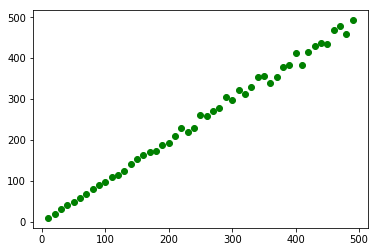

In [0]:
plt.plot(xvals, avgD, 'go')


Based on the plot above, it seems like as the number of steps increase, the average squared distance increases as well. Moreover, it seems like the relationship is reallly similar to y=x

#Return to Origin

For this section, I would investigate often does te wallk comes back to a circle with radius of 0.5. The logic is that, first set the first step, while the last locations square distance is bigger than 0.5, move another step. Whenever the squared distance of last location is equal to or smaller than 0.5, the function stops running and return the length of all the locations. This is thhe number of walks it takes to walk back to origin.

In [0]:
def stepsToOriginP(maxSteps):
  locations = np.zeros((1,2)) # 1 row, 2 columns
  
  # first step
  a = random.uniform(0, 2) # select a random factor
  theta = a * math.pi      # theta is random
  move = [math.cos(theta), math.sin(theta)]
  locations = np.append(locations, [move], axis=0)
 # take steps until return to the circle with r=1/2

  while  math.sqrt(locations[-1][[0]]**2 + locations[-1][[1]]**2) > 0.5 and (len(locations) < maxSteps):  # avoid an infinite loop?
    a = random.uniform(0, 2)
    theta = a * math.pi
    move = [math.cos(theta), math.sin(theta)]
    nextloc = locations[-1] + move
    locations = np.append(locations, [nextloc],axis=0)
  
  return len(locations) 

In [0]:
stepsToOriginP(10000) ## test theh function

10000

Now, make a list of steps it takes to go back to origin

In [0]:
stepListP = [stepsToOriginP(10000) for _ in range(100)] ## this line might be slow

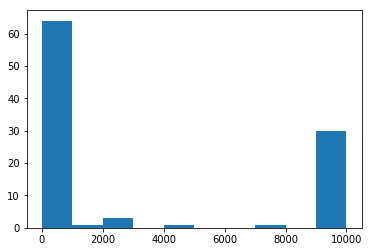

In [0]:
plt.hist(stepListP);

From the boxplot above, it seems like there are values on the left end than right end. Also, there are only few number of steps occur in the middle.

# When  -10 <= y <= 10

For this part, the idea is that, whenever next location is bigger than 10 or smaller than -10, take step back so that it will not go out of bounds. So, for here, I used an if loop: if next location is bigger than 10 or smaller thaan -10. take another step and do not append next location to the locations list. Otherwise, append all thhe locations into the list of locations. Thus, every element in the location list should have y values smaller than 10 and bigger than -10. 


In [0]:
  numStep=1000
  locations2 = np.zeros((1,2))    # 1 row, 2 columns, entries set to zero
# take steps
  for i in range(1,numStep): 
    a = random.uniform(0, 2)
    theta = a * math.pi      
    move = [math.cos(theta), math.sin(theta)]   
    nextloc = locations2[-1] + move
    if nextloc[1] < -10:           ## first condition
      a = random.uniform(0, 2)
      theta = a * math.pi      
      move = [math.cos(theta), math.sin(theta)]   
      nextloc = locations2[-1] + move
    elif nextloc[1] > 10:         ## second condition
        a = random.uniform(0, 2)
        theta = a * math.pi      
        move = [math.cos(theta), math.sin(theta)]   
        nextloc = locations2[-1] + move
    else:        
        locations2 = np.append(locations2, [nextloc],axis=0)
    
 

Comment, use while loop while nextlock <- 10 or nextloc > 10: keep mooving. 

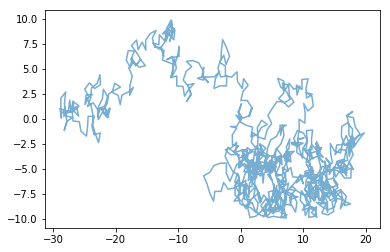

In [0]:
plt.plot(locations2[:,0], locations2[:,1], alpha = 0.6) ## make a plot

Seems like every locations is in the range of y=10 and y=-10. Let's do more check

For next step, first define ncol is the total column of the list locations. Then, extract the all the y-values from the list, so yvals is all the y values from each list in the location list.

In [0]:
ncol = len(locations2)
yvals=locations2[range(0,ncol),1] ## this range argument allows me to get y values from each row



In [0]:
min(yvals)

-9.860336504061719

the smallest y value is -9.8. We are good for lower bound.

In [0]:
max(yvals)

9.890068477380739

The max y value from the location list is 9.8. We are good for upper bound. 

Next, pack everything into a function. Take input as the number of steps, then return the last location

In [0]:
def walkY(numStep):
  locations2 = np.zeros((1,2))    # 1 row, 2 columns, entries set to zero
# take steps
  for i in range(1,numStep): 
    a = random.uniform(0, 2)
    theta = a * math.pi      
    move = [math.cos(theta), math.sin(theta)]   
    nextloc = locations2[-1] + move
    if nextloc[1] < -10:        
      a = random.uniform(0, 2)
      theta = a * math.pi      
      move = [math.cos(theta), math.sin(theta)]   
      nextloc = locations2[-1] + move
    elif nextloc[1] > 10:        
        a = random.uniform(0, 2)
        theta = a * math.pi      
        move = [math.cos(theta), math.sin(theta)]   
        nextloc = locations2[-1] + move
    else:        
        locations2 = np.append(locations2, [nextloc],axis=0)
  return locations2[-1]
    
 

In [0]:
walkP(1000) ## test the function

array([10.63928026,  6.83013569])

### Average squared distance

For this new function, calculate the average squared distance. The squared distance function is te same as before. 

In [0]:
def SqrDistanceY(list):
  return list[0]**2 + list[1]**2  ## samce squared distance function as before

In [0]:
SqrDistance(walkY(10000)) ## test the function

3170.4036520001273

Then, for next step, calculate the average distance from origin. The function is thhe same as before

In [0]:
def AveDistanceY(numStep, numWalks):
  dis = [SqrDistanceY(walkY(numStep)) for _ in range(numWalks)]
  
  return (sum(dis)/numWalks)    ## same average squared distance function as before

In [0]:
AveDistanceY(100,1000) # test the function

77.59289799864516

For next step, make a llist of values, and use these values create a list of average distance. Make a plot

In [0]:
 ##this chunk of lines might be slow 
avgD1 = [AveDistanceY(n,1000) for n in xvals1]

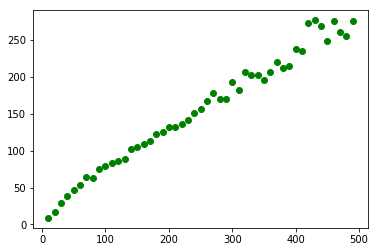

In [0]:
plt.plot(xvals1, avgD1, 'go')

For the plot above, the relationship seems to be linear and positive as well. Recal that when y does not have range limit, the relationship is close to y = x. For this one, line is a little bit below y = x and more close to y=1/2 x. Thus, when y is restricted, as the number of steps increases, the average squared distance increases at a slower rate and appear less linear as number of steps become very big.  

###Return to Origin

Then, investigate how often the walk return to the circle with radius of 0.5. The logic is the same as before: while the squared distance is bigger than 0.5, take another step. When the distance is smaller than 0.5, stop running, and the length of the list of locations is the step it takes to walk back to the circle.

In [0]:
def stepsToOriginY(maxSteps):
  locations = np.zeros((1,2)) # 1 row, 2 columns
  
  # first step
  a = random.uniform(0, 2) # select a random factor
  theta = a * math.pi      # theta is random
  move = [math.cos(theta), math.sin(theta)]
  locations2 = np.append(locations, [move], axis=0)
 # take steps until return to the circle with r=1/2

  while  math.sqrt(locations2[-1][[0]]**2 + locations2[-1][[1]]**2) > 0.5 and (len(locations2) < maxSteps):  # avoid an infinite loop?
    for i in range(1,maxSteps): 
      a = random.uniform(0, 2)
      theta = a * math.pi      
      move = [math.cos(theta), math.sin(theta)]   
      nextloc = locations2[-1] + move
    if nextloc[1] < -10:        
      a = random.uniform(0, 2)
      theta = a * math.pi      
      move = [math.cos(theta), math.sin(theta)]   
      nextloc = locations2[-1] + move
    elif nextloc[1] > 10:        
        a = random.uniform(0, 2)
        theta = a * math.pi      
        move = [math.cos(theta), math.sin(theta)]   
        nextloc = locations2[-1] + move
    else:        
        locations2 = np.append(locations2, [nextloc],axis=0)
  
  return len(locations2) 

Then, make a list of number of steps it takes to walk back to origin

In [0]:
stepListY = [stepsToOriginY(1000) for _ in range(100)] ## this line might be slow

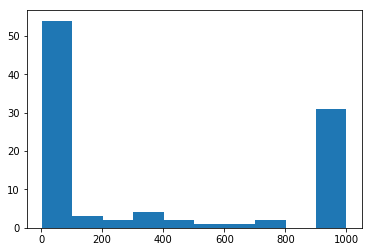

In [0]:
plt.hist(stepListY);

From the boxplot of number of steps return to origin from above, it seems like there are a lot of steps that occur at the two ends. Also, the number of steps in the middle appear to be more frequent than when y is not restricted. 

#Limitation and Discussion

Limitation: 
*   When creating both stepListP and stepListY for graphing purpose, the runtime becomes very long if there are a lot of steps. For example, I tried 10,000 steps for both, and both have ran more than 10 mins, so I decided to use smaller amount of steps which would still show a similar pattern
*   For the function return to origin when y is restricted to a range of -10 and 10, there are a lot of codes there. Maybe there are some ways to make the function shorter in length. 
*  (This is more like a question) For the boxplots for steps to origin and at the right end 1000, steps occur there at 1000, are they return to origin at steps 1000? Or it is just because I set the max steps to be 1000 and when reaching to 1000, the function just stops, so the steps at 1000 acutall mean that those steps need to be longer than 1000 to return to the origin. 
* Also, Collab does not have check spelling feature, which for users can be another practice of writting anything more precisely. 



Discussion: 

Through the process of making this project, I have developed more proficiency and knowledge about python syntax such as list manipulation and the spacing/index between lines. Also, I have found several ways to write a function that has a lot of codes and make it works

*   Start with a single piece of the function, make sure every single piece of the function works first 
*   Test every single piece from the function. Make sure the output for every step is what we want


*   Before actually coding, use pencil and pen to write down the main idea (input, return, kinds of loops, etc.) on a piece of paper first, then try to code them 
*   After writting the code, tell myself what each line/loop is doing and what kind of output (a list, a number) I should expect to get


*   Test the function with small numbers, then increase the input value
*   A graph/plot is always helpful to check if I am getting what I want
*   Read the error message. They actually tell me how to fix the problems










#Test Section

For this section, I just used this space to test some of the features and functions in python, or some of the codes I used for this project. This section itself is not directly related to this project, but I would like to keep this since this reflects my thinking process, and I would like to keep this section for future reference

In [0]:
random.uniform(0, 2) ## randomly pick a number between 0 and 2 with equal distribution

0.4603771183863139

In [0]:
list1 =np.array([[1,2],[3,4],[4,6]]) # pick the last list in an array, and pick the last number in that array
list1[-1][[1]]

array([6])

In [0]:
math.sqrt((list1[-1][[0]])**2 + (list1[-1][[1]])**2) ## test if elements from array can be squared and add to another similar elements

7.211102550927978

In [0]:
list3=np.array([2,3]) ## test multiplication for elements in a list
list3[0]**2 + list3[1]**2

13

For the code blow, there is an array that has 4 elements. I want to get the last number of each element. Here is how to do it in python. I used this idea to get the y-values from locations and test all the y-values whether they are bigger than 10 or smaller than -10 

In [0]:
x = np.array([[ 0,  1,  2], 
           [ 3,  4,  5],
           [ 6,  7,  8],      
           [ 9, 10, 11]])
rows = np.array([[0, 0],
                [3, 3]], dtype=np.intp)
columns = np.array([[0, 2],
                    [0, 2]], dtype=np.intp)
x[range(0,4), 2]


array([ 2,  5,  8, 11])